In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import plotly.express as px

In [3]:
df = pd.read_csv("Data/train.csv", index_col="PassengerId")

# EDA and Preprocessing

### Variable Descriptions

| Variable | Definition                                 | Key                                            |
| ---------| ------------------------------------------ | ---------------------------------------------- |
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |	                                             |
| Age      | Age in year                                |	                                             |
| sibsp    | # of siblings / spouses aboard the Titanic |		                                         |
| parch    | # of parents / children aboard the Titanic |		                                         |
| ticket   | Ticket number                              |		                                         |
| fare     | Passenger fare                             |	                                             |	
| cabin    | Cabin number                               |	                                             |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |


### Variable Notes
| **variable** | **Note** | **Additional Info** |
| -------------| -------- | ------------------- |
| ***pclass*** | A proxy for socio-economic status (SES) | <ul><li>1st = Upper</li><li>2nd = Middle</li><li>3rd = Lower</li></ul> |
| ***age***| Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 |
| ***sibsp*** | The dataset defines family relations in this way ==> | <ul><li>Sibling = brother, sister, stepbrother, stepsister</li><li>Spouse = husband, wife (mistresses and fiancés were ignored)</li></ul> |
| parch    | The dataset defines family relations in this way ==> |<ul><li>Paent = mother, father</li><li>Child = daughter, son, stepdaughter, stepson</li></ul>|

### Split Data and Take a Look

In [4]:
# Let's split data in two
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Survived'])

In [5]:
print('Train data traget distribution:', train_df.Survived.value_counts(), end='\n\n')
print('Test data traget distribution:', test_df.Survived.value_counts())

Train data traget distribution: Survived
0    439
1    273
Name: count, dtype: int64

Test data traget distribution: Survived
0    110
1     69
Name: count, dtype: int64


In [6]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S


In [7]:
# Check train_df for missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 693 to 508
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       575 non-null    float64
 5   SibSp     712 non-null    int64  
 6   Parch     712 non-null    int64  
 7   Ticket    712 non-null    object 
 8   Fare      712 non-null    float64
 9   Cabin     160 non-null    object 
 10  Embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [8]:
# Check test_df for missing values
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 566 to 638
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  179 non-null    int64  
 1   Pclass    179 non-null    int64  
 2   Name      179 non-null    object 
 3   Sex       179 non-null    object 
 4   Age       139 non-null    float64
 5   SibSp     179 non-null    int64  
 6   Parch     179 non-null    int64  
 7   Ticket    179 non-null    object 
 8   Fare      179 non-null    float64
 9   Cabin     44 non-null     object 
 10  Embarked  179 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 16.8+ KB


<p style="background-color: #32656e"><i>Looks like there are several missing values in both datasets. <b><i>Age</i></b> has null values in both tables, and we will try to impute them later. About 3/4th of <b><i>Cabin</i></b> values are missing in both tables. There is no way to impute them so we will drop the entire variable. As for <b><i>Embarked</i></b>, there are 2 values missing so, dropping those two rows won't affect anything.</i></p>

### Impute Missing Values and Drop Those that Can't be Helped

In [9]:
# Drop Cabin
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

# Drop two missing values of Embarked in train_df
train_df.dropna(subset=['Embarked'], inplace=True)

In [10]:
# extract honorifics from name
train_df["Honorifics"] = train_df.Name.str.split(",").str[1].str.split(".").str[0]
test_df["Honorifics"] = test_df.Name.str.split(",").str[1].str.split(".").str[0]

In [11]:
honorifies_df = pd.concat([
    train_df.loc[train_df.Age.isna()==True, "Honorifics"].value_counts(), \
    test_df.loc[test_df.Age.isna()==True, "Honorifics"].value_counts()
    ], axis=1).fillna(0).astype('int')
honorifies_df.columns = ["Train", "Test"]

print("Number of Age missing values aggregated by Honorifics")
honorifies_df

Number of Age missing values aggregated by Honorifics


,Train,Test
Honorifics,,
Mr,94,25
Miss,26,10
Mrs,13,4
Master,3,1
Dr,1,0


<p style="background-color: #32656e"><i>There is not any <b><i>Dr</i></b> in test set but that's ok.</i></p>

In [12]:
fig = px.scatter(train_df.loc[train_df['Honorifics'].isin(list(honorifies_df.index))], x="Age", y="Age", color="Honorifics")
fig.show()

<p style="background-color: #32656e"><i>Using <i><b>Honorifics</b></i> to impute <i><b>Age</b></i> will be better than using just a mean of <i><b>Age</b></i> column, because people with different honorifics have different age range and therefore, different mean age. </i></p>

In [13]:
# Get average for each Honorific with missing Age value
age_mapping = train_df.loc[train_df['Honorifics'].isin(list(honorifies_df.index)), ['Age', 'Honorifics']].groupby('Honorifics').mean().round().to_dict()["Age"]
age_mapping

{' Dr': 42.0, ' Master': 4.0, ' Miss': 21.0, ' Mr': 32.0, ' Mrs': 36.0}

In [14]:
# Imputing Age
train_df["Age"] = np.where(train_df.Age.isna(), train_df['Honorifics'].map(age_mapping), train_df.Age)
test_df["Age"] = np.where(test_df.Age.isna(), test_df['Honorifics'].map(age_mapping), test_df.Age)

<p style="background-color: #32656e"><i>Now that missing values have been taken care of, let's make some graphs</i></p>

### Make Graphs and Get Insight

In [17]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Honorifics
PassengerId,,,,,,,,,,,
693,1,3,"Lam, Mr. Ali",male,32.0,0,0,1601,56.4958,S,Mr
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,32.0,0,0,239854,0.0000,S,Mr
528,0,1,"Farthing, Mr. John",male,32.0,0,0,PC 17483,221.7792,S,Mr
856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,S,Mrs
802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,S,Mrs


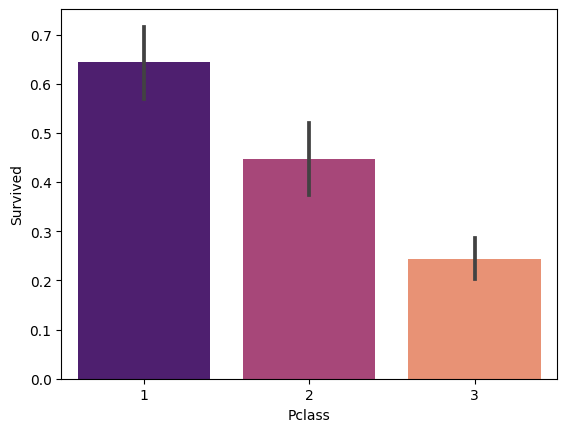

In [20]:
sns.barplot(train_df, x='Pclass', y='Survived', palette='magma')
plt.show()